In [217]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [218]:
exit_notes_df = pd.read_excel(r'C:\Users\David Chaniott\Documents\Nashville Software School\python\projects\ddid-cheesecake_factory\data/idea.xlsx',  sheet_name = 'Exit Notes')

In [219]:
exit_notes_df['reopenedTF'] = (exit_notes_df['Exit Note'].str.contains('reopened', case = False))

In [220]:
exit_notes_df['reopen_dates'] = exit_notes_df['Exit Note'].str.findall('Reopened: \\d{2}/\\d{2}/\\d{4}')
exit_notes_df['exit_dates'] = exit_notes_df['Exit Note'].str.findall('Exit Date: \\d{2}/\\d{2}/\\d{4}')

In [221]:
reopen_date_df = exit_notes_df.reopen_dates.to_frame().astype(str)
reopen_date_df = reopen_date_df.reopen_dates.str.split(',', expand = True)
reopen_date_df = reopen_date_df.replace({'\[':'', '\]':'', '\'':'', 'Reopened:':''}, regex=True)
reopen_date_df = reopen_date_df.rename(columns = {0: 'reopen1', 1: 'reopen2', 2: 'reopen3', 3: 'reopen4', 4: 'reopen5', 5: 'reopen6'})

In [222]:
exit_date_df = exit_notes_df.exit_dates.to_frame().astype(str)
exit_date_df = exit_date_df.exit_dates.str.split(',', expand = True)
exit_date_df = exit_date_df.replace({'\[':'', '\]':'', '\'':'', 'Exit Date:':''}, regex=True)
exit_date_df = exit_date_df.rename(columns = {0: 'exit1', 1: 'exit2', 2: 'exit3', 3: 'exit4', 4: 'exit5', 5: 'exit6'})

In [223]:
reopen_date_df = reopen_date_df.astype('datetime64')
exit_date_df = exit_date_df.astype('datetime64')

In [224]:
exit_notes_df = exit_notes_df.reset_index(drop = False)
reopen_date_df = reopen_date_df.reset_index(drop = False)
exit_date_df = exit_date_df.reset_index(drop = False)

In [225]:
exit_notes_df = exit_notes_df.merge(reopen_date_df, how = 'left', on = 'index')

In [226]:
exit_notes_df = exit_notes_df.merge(exit_date_df, how = 'left', on = 'index')

In [227]:
exit_notes_df = exit_notes_df.drop(columns = ['index', 'reopen_dates', 'exit_dates'])

In [228]:
exit_notes_df['days1'] = np.timedelta64(0)
exit_notes_df['days2'] = np.timedelta64(0)
exit_notes_df['days3'] = np.timedelta64(0)
exit_notes_df['days4'] = np.timedelta64(0)
exit_notes_df['days5'] = np.timedelta64(0)
exit_notes_df['days6'] = np.timedelta64(0)

In [229]:
def awesome(R,E) :
    
    difference = (R - E)
    return(difference)

In [230]:
for index, row in exit_notes_df.iterrows() :
    
    #days1
    
    r = row['reopen1']
    e = row['exit1']
    exit_notes_df.at[index, 'days1'] = awesome(r,e)
    
    #days2
    
    r = row['reopen2']
    e = row['exit2']
    exit_notes_df.at[index, 'days2'] = awesome(r,e)
    
    #days3
    
    r = row['reopen3']
    e = row['exit3']
    exit_notes_df.at[index, 'days3'] = awesome(r,e)
    
    #days4
    
    r = row['reopen4']
    e = row['exit4']
    exit_notes_df.at[index, 'days4'] = awesome(r,e)
    
    #days5
    
    r = row['reopen5']
    e = row['exit5']
    exit_notes_df.at[index, 'days5'] = awesome(r,e)
    
    #days6
    
    r = row['reopen6']
    e = row['exit6']
    exit_notes_df.at[index, 'days6'] = awesome(r,e)

In [231]:
exit_notes_df = exit_notes_df.fillna(pd.Timedelta('0 days'))

In [232]:
exit_notes_df['day_adjustment'] = pd.DataFrame(exit_notes_df['days1']+exit_notes_df['days2']+exit_notes_df['days3']+exit_notes_df['days4']+exit_notes_df['days5']+exit_notes_df['days6'])

In [233]:
exit_notes_df = exit_notes_df.drop(columns=['reopen1', 'reopen2', 'reopen3', 'reopen4', 'reopen4', 'reopen5', 'reopen6', 'exit1', 'exit2', 'exit3', 'exit4', 'exit5', 'exit6', 'days1', 'days2', 'days3', 'days4', 'days5', 'days6'])

In [234]:
exit_notes_df.day_adjustment = exit_notes_df.day_adjustment.dt.days.astype(int)

In [235]:
#Corrected Service Days
exit_notes_df['corrected_service_days'] = exit_notes_df['Days from I-IFSP to Exit'] - exit_notes_df.day_adjustment

In [236]:
# Child Age at Exit
exit_notes_df['child_age_at_exit'] = exit_notes_df['Exit Date'] - exit_notes_df['DOB']
exit_notes_df.child_age_at_exit = exit_notes_df.child_age_at_exit.dt.days.astype(int)

In [237]:
# Onboarding length Data
# Child Age at Entrance
exit_notes_df['Child_Age_At_Entrance'] = exit_notes_df['Initial IFSP Date'] - exit_notes_df['DOB']
exit_notes_df['Child_Age_At_Entrance'] = exit_notes_df['Child_Age_At_Entrance'].dt.days.astype(int)

# Processing Speed (Days between ELigbility to IIFSP)
exit_notes_df['Processing_Speed'] = exit_notes_df['Initial IFSP Date'] - exit_notes_df['Notification Date']
exit_notes_df['Processing_Speed'] = exit_notes_df['Processing_Speed'].dt.days.astype(int)
exit_notes_df.dtypes

POE                                 object
Child ID                             int64
DOB                         datetime64[ns]
Notification Date           datetime64[ns]
Initial Eligibility Date    datetime64[ns]
Initial IFSP Date           datetime64[ns]
Latest IFSP Date                    object
Exit Reason                         object
Exit Date                   datetime64[ns]
Days from I-IFSP to Exit             int64
Exit Note                           object
reopenedTF                          object
day_adjustment                       int32
corrected_service_days               int64
child_age_at_exit                    int32
Child_Age_At_Entrance                int32
Processing_Speed                     int32
dtype: object

In [238]:
# DF Head for Visual Aid

exit_notes_df.head(1)

,POE,Child ID,DOB,Notification Date,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date,Days from I-IFSP to Exit,Exit Note,reopenedTF,day_adjustment,corrected_service_days,child_age_at_exit,Child_Age_At_Entrance,Processing_Speed
0,UC,471738,2019-02-28,2019-10-17,2019-10-29,2019-10-31,2020-05-12 00:00:00,618 - Parent withdraw,2020-09-21,326,* No Exit ECO available due to COVID-19,False,0,326,571,245,14


In [239]:
# CORRELATIONS
exit_notes_df[['corrected_service_days', 'Child_Age_At_Entrance', 'Processing_Speed']].corr()


,corrected_service_days,Child_Age_At_Entrance,Processing_Speed
corrected_service_days,1.000000,-0.588837,-0.058881
Child_Age_At_Entrance,-0.588837,1.000000,0.050963
Processing_Speed,-0.058881,0.050963,1.000000


In [240]:
# Info, Shapes, Descriptions

In [241]:
exit_notes_df.Processing_Speed.describe()

count    5582.000000
mean       37.912397
std        21.563930
min      -607.000000
25%        30.000000
50%        37.000000
75%        43.000000
max       625.000000
Name: Processing_Speed, dtype: float64

In [242]:
## Graphs and Shit

<AxesSubplot:>

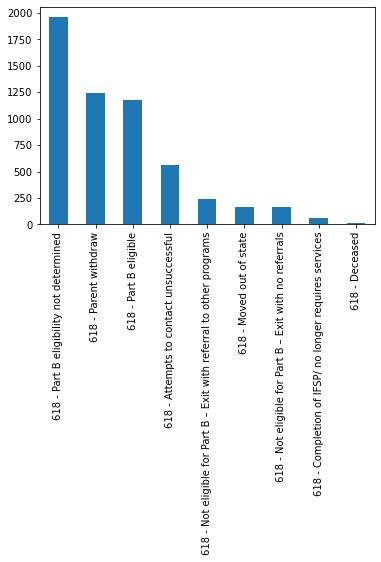

In [243]:
exit_notes_df['Exit Reason'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Child_Age_At_Entrance', ylabel='corrected_service_days'>

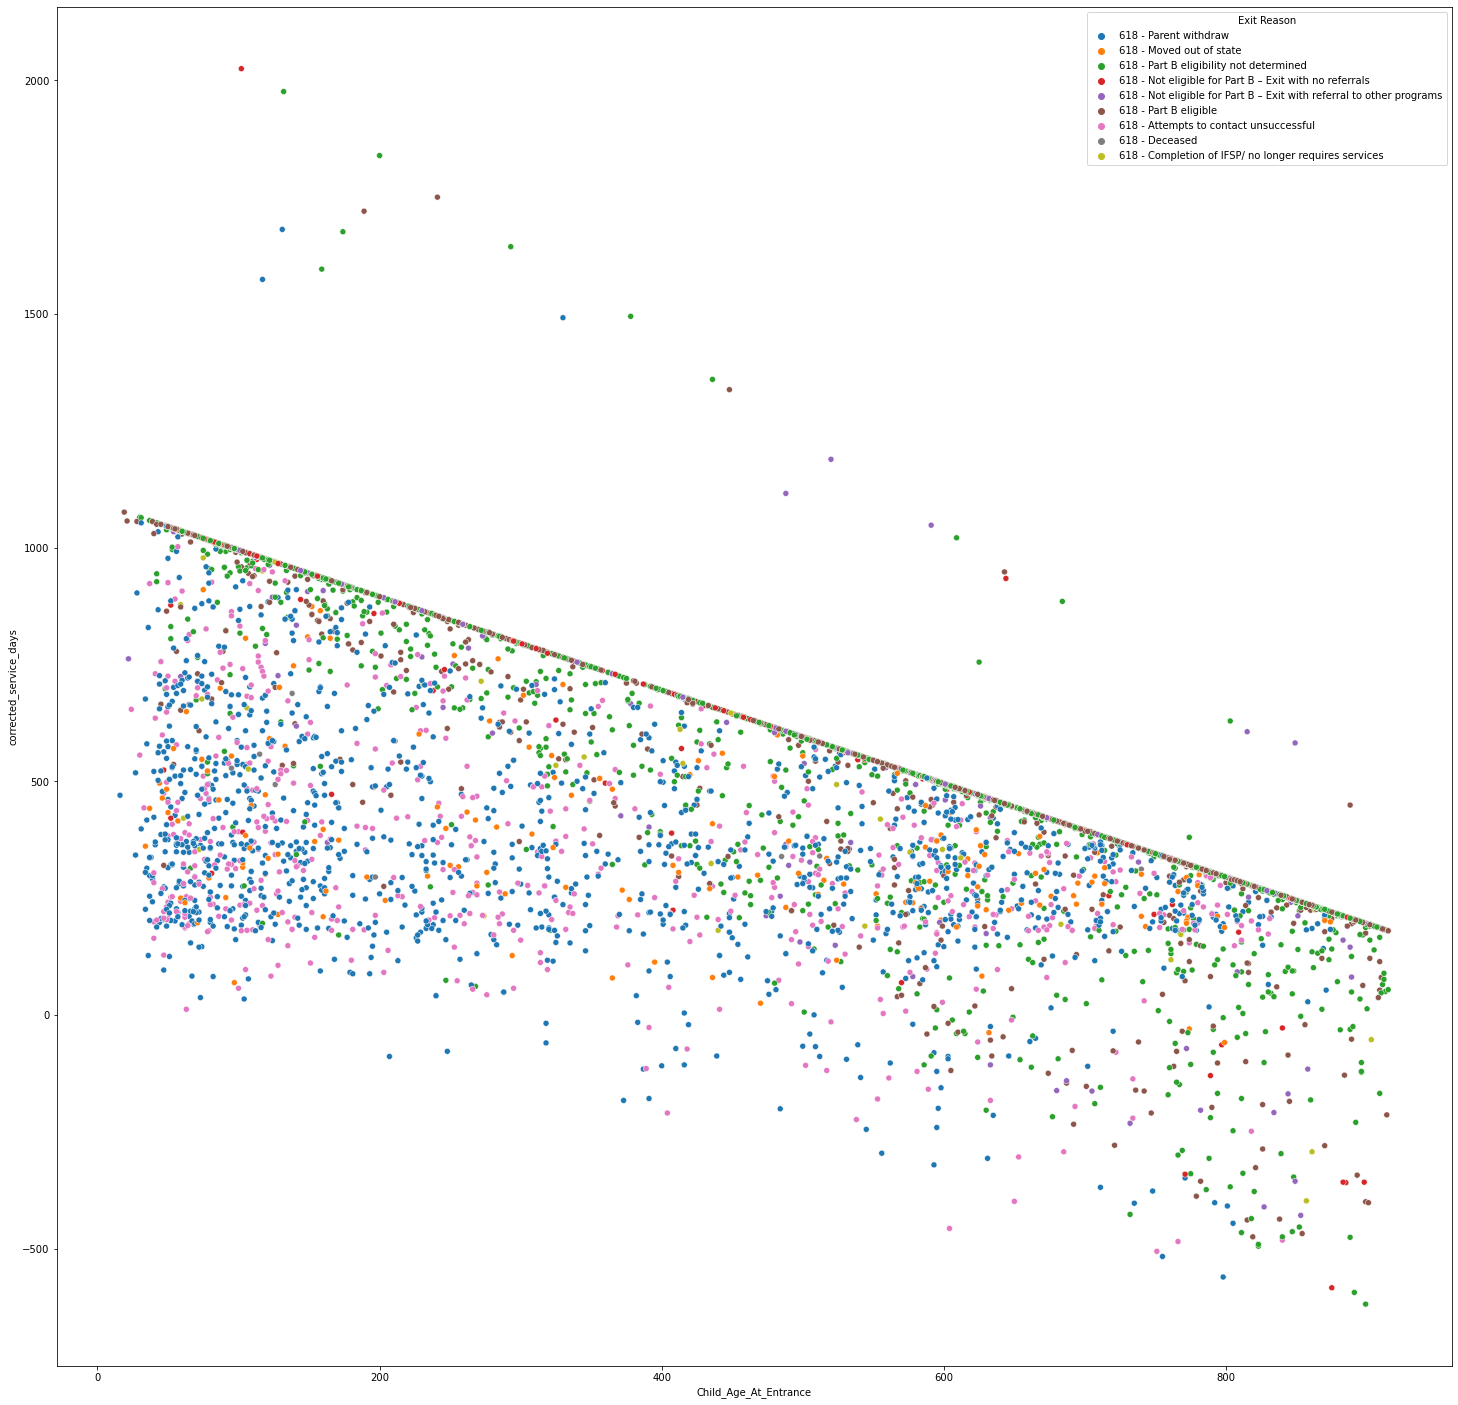

In [244]:
# Child Age at Entrance vs. Total Days
plt.figure(figsize = (25,25))

sns.scatterplot(data = exit_notes_df,
                x = 'Child_Age_At_Entrance',
                y = 'corrected_service_days',
                hue = 'Exit Reason')

<AxesSubplot:xlabel='child_age_at_exit', ylabel='corrected_service_days'>

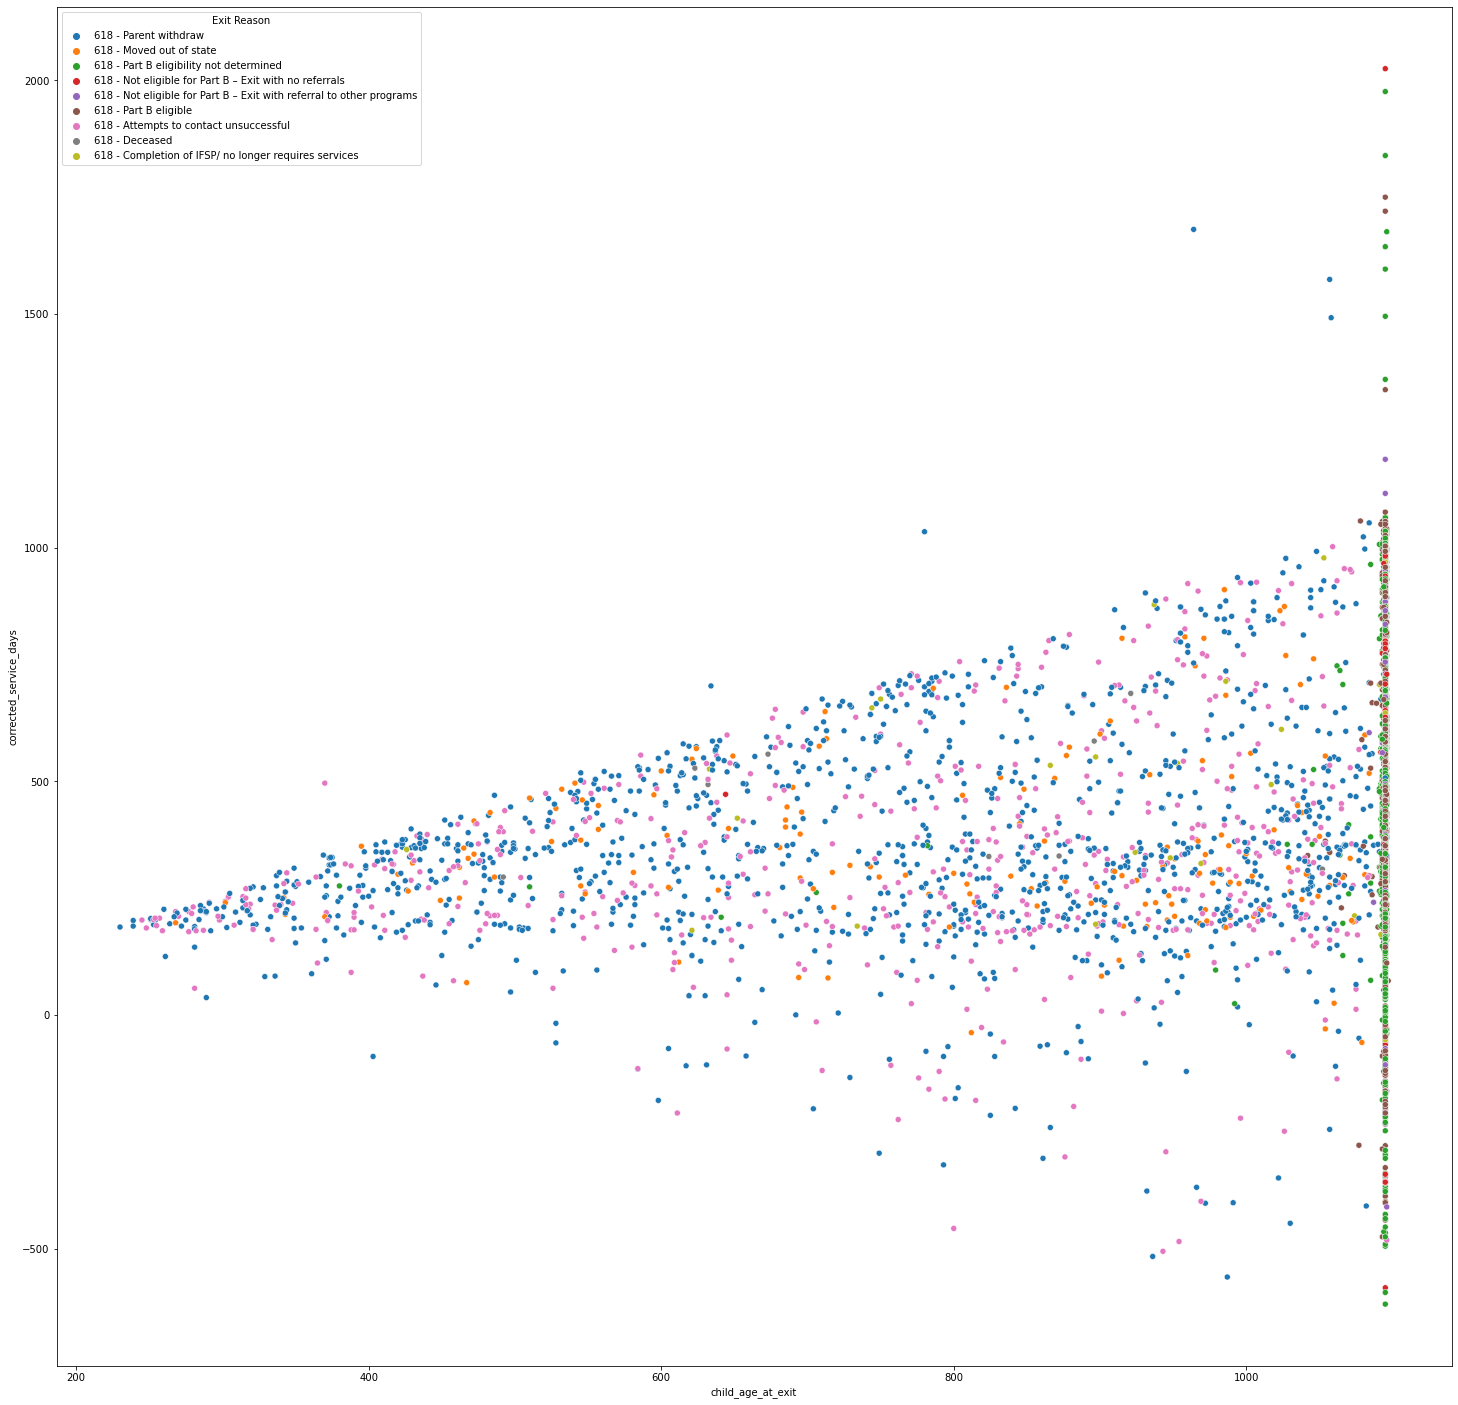

In [245]:
# Age at Exit vs. Total Days
plt.figure(figsize = (25,25))

sns.scatterplot(data = exit_notes_df,
                x = 'child_age_at_exit',
                y = 'corrected_service_days',
                hue = 'Exit Reason')

<AxesSubplot:xlabel='Processing_Speed', ylabel='corrected_service_days'>

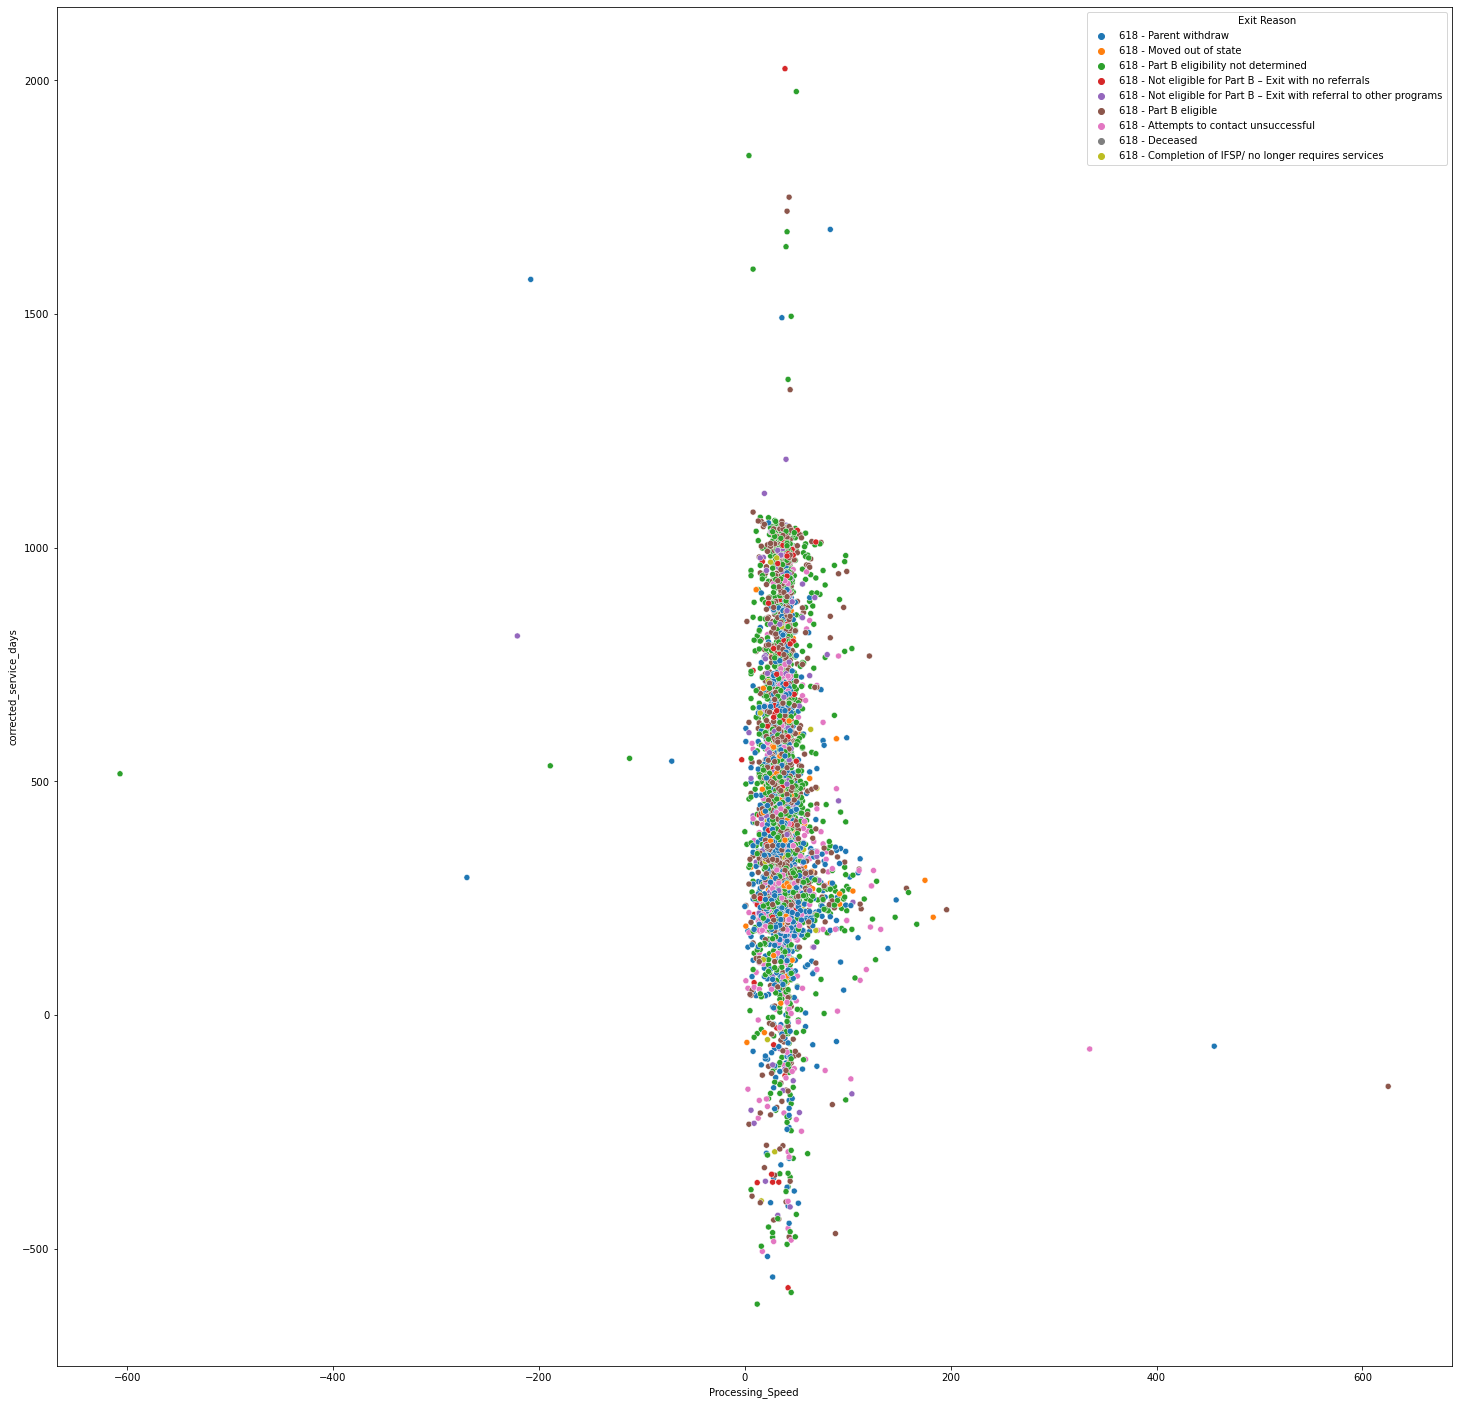

In [246]:
# Processing vs. Total Days
plt.figure(figsize = (25,25))

sns.scatterplot(data = exit_notes_df,
                x = 'Processing_Speed',
                y = 'corrected_service_days',
                hue = 'Exit Reason')